# Ön İşleme

**Veri Ön İşleme**
    
    Veri Temizleme (Data Cleaning)
        Gürültülü Veri Analizi (Noisy Data Analysis)
        Aykırı Gözlem analizi (Outlier Analysis)
        Eksik Veri Analizi (Missing Data Analysis)
    Veri Standardizasyonu (Data Standardization, Feature Scaling)
        0-1 Dönüşümü (Normalization)
        z-skoru Dönüşümü (Standardization)
        Logaritmik Dönüşüm (Log Transformation)
    Veri İndirgeme (Data Reduction)
        Gözlem (Observation) Sayısının azaltılması
        Değişken (Vasiable) Sayısının azaltılması
    Değişken Dönüşümleri (Variable Transformation)
        Sürekli değişken dönüşümleri
        Kategorik Değişken Dönüşümleri

## 1. Aykırı Gözlem 
Veride genel eğilimin oldukça dışına çıkan ya da diğer gözlemlerden oldukça farklı olan gözlemlere aykırı gözlem denir.

Aykırılığı ifade eden nümerik değere **aykırı değer** denir.

Aykırı değeri barındıran gözlem birimine **aykırı gözlem** denir.

Genellenebilirlik kaygısıyla oluşturulan kural setlerini yanıltır. Yanlılığa sebep olur. Bu nedenle genellemenin dışında kalacak aykırı verilerin çalışmanın dışına çıkartılması gerekir.

**Standart Sapma Yaklaşımı**

    Eşik değer= Ortalama + 1 X Standart Sapma
    Eşik değer= Ortalama + 2 X Standart Sapma
    Eşik değer= Ortalama + 3 X Standart Sapma
    
**Z-Skoru Yaklaşımı**

    Standart sapma yöntemine benzer şekilde, dağılımın sağından ve solundan -+2.5 eşiklenebilir.
    
**Boxplot Yöntemi**

    En sık kullanılan yöntemlerden biridir. Değişken değerleri küçükten büyüğe sıralanır. Q1,Q3 değerlerinin üzerinden bir eşik değer hesaplanır.
    
    IQR (Inter Quartile) = 1.5 x (Q3-Q1)
    Alt Eşik Değer = Q1 - IQR
    Üst Eşik Değer = Q3 + IQR


### 1.1. Aykırı Değerlerin Tespiti

In [1]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) #sadece sayısal değerleri alıyoruz
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

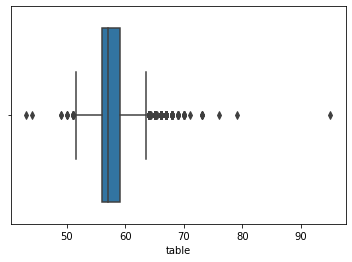

In [3]:
sns.boxplot(x = df_table);

In [4]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [5]:
print(Q1)
print(Q3)
print(IQR)

56.0
59.0
3.0


In [6]:
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [7]:
print(alt_sinir)
print(ust_sinir)

51.5
63.5


In [8]:
(df_table < alt_sinir) | (df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [9]:
aykiri_tf = (df_table < alt_sinir) | (df_table > ust_sinir)
df_table[aykiri_tf]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [10]:
df_table[aykiri_tf].index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

### 1.2. Aykırı Değerler Sorununun Çözülmesi

In [18]:
df_table[aykiri_tf]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

#### 1.2.1. Silme

In [11]:
import pandas as pd
type(df_table)

pandas.core.series.Series

In [12]:
df_table = pd.DataFrame(df_table)
df_table.shape

(53940, 1)

In [24]:
#aykırı olmayanları seçiyoruz
t_df = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis = 1)]
t_df.shape

(53335, 1)

#### 1.2.2. Ortalama ile Doldurma

In [1]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df_table = df["table"]

In [2]:
aykiri_tf.head()

NameError: name 'aykiri_tf' is not defined

In [27]:
df_table[aykiri_tf]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [28]:
df_table.mean()

57.45718390804603

In [29]:
df_table[aykiri_tf] = df_table.mean()

C:\Users\evr\AppData\Local\Temp/ipykernel_624/3741757661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = df_table.mean()


In [30]:
df_table[aykiri_tf]

2        57.457184
91       57.457184
145      57.457184
219      57.457184
227      57.457184
           ...    
53695    57.457184
53697    57.457184
53756    57.457184
53757    57.457184
53785    57.457184
Name: table, Length: 605, dtype: float64

#### 1.2.3. Baskılama Yöntemi

In [13]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df_table = df["table"]

In [14]:
df_table[aykiri_tf]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [15]:
print(alt_sinir)
print(ust_sinir)

51.5
63.5


In [16]:
aykiri_alt = (df_table < alt_sinir) 
aykiri_ust= (df_table > ust_sinir)
df_table[aykiri_alt] = alt_sinir
df_table[aykiri_ust] = ust_sinir

C:\Users\evr\AppData\Local\Temp/ipykernel_9036/1835202628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_alt] = alt_sinir
C:\Users\evr\AppData\Local\Temp/ipykernel_9036/1835202628.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_ust] = ust_sinir


In [17]:
df_table[aykiri_tf]

2        63.5
91       63.5
145      63.5
219      63.5
227      63.5
         ... 
53695    63.5
53697    63.5
53756    63.5
53757    63.5
53785    63.5
Name: table, Length: 605, dtype: float64

#### 1.2.4. Çok Değişkenli Aykırı Gözlem Analizi

**Local Outlier Factor**

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlar.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılır. Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabilir. Dolayısıyla burada bir komşuluk yapısı söz konusudur. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendirilir.

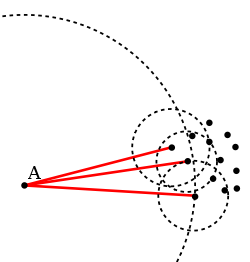

In [18]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.select_dtypes(include = ['float64', 'int64']) 
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [19]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
#skorlama işlemi
#n_neighbors(komşuluk sayısı), contamination(yoğunluk)
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [20]:
#her bir gözlem biriminin skoru
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [21]:
df_scores = clf.negative_outlier_factor_
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [22]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

üstte özellikle -5.86'dan -4.98'e bir geçiş olduğunu görüyoruz. diğerlerinde ise geçiş aralığı daha düşük. bu noktada bu geçişi eşik olarak kullanabiliriz (farklı bir değer de seçebilirsiniz).

In [23]:
esik_deger = np.sort(df_scores)[3]

In [24]:
aykiri_tf = df_scores > esik_deger
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

**Silme**

In [25]:
#aykırı gözlemler
df[df_scores < esik_deger]

,carat,depth,table,price,x,y,z
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [26]:
yeni_df  = df[df_scores > esik_deger]
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


**Baskılama**

In [33]:
df[df_scores == esik_deger]

,carat,depth,table,price,x,y,z
50773,0.81,68.8,79.0,2301,5.26,5.2,3.58


In [34]:
baski_deger = df[df_scores == esik_deger]

In [35]:
aykirilar = df[~aykiri_tf]
aykirilar

,carat,depth,table,price,x,y,z
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12
50773,0.81,68.8,79.0,2301,5.26,5.20,3.58


**Not:** Elimizdeki mevcut aykırılar yerine, eşikteki değerleri atayacağız bu nedenle kopyalama işlemi esnasında indexleri de alacağından indexlerde sorunu çıkacaktır. bu yüzden de atama işleminden önce indexleri hesaba katmadan bunu yapacağız.

In [36]:
aykirilar.to_records(index = False)

rec.array([(1.03, 78.2, 54. , 1262, 5.72,  5.59,  4.42),
           (0.51, 61.8, 54.7, 1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. , 2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. , 2301, 5.26,  5.2 ,  3.58)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [37]:
#aykırıların indexsiz bir kopyasını aldık
res = aykirilar.to_records(index = False)

In [38]:
#res içindeki tüm değerleri baski_deger ile değiştiriyoruz
res[:] = baski_deger.to_records(index = False)
res

rec.array([(0.81, 68.8, 79., 2301, 5.26, 5.2, 3.58),
           (0.81, 68.8, 79., 2301, 5.26, 5.2, 3.58),
           (0.81, 68.8, 79., 2301, 5.26, 5.2, 3.58),
           (0.81, 68.8, 79., 2301, 5.26, 5.2, 3.58)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [39]:
#bunlar normal değerlerimiz
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12
50773,0.81,68.8,79.0,2301,5.26,5.20,3.58


In [40]:
#res'teki değerleri bunlarla değiştiriyoruz
import pandas as pd
df[~aykiri_tf] = pd.DataFrame(res, index = df[~aykiri_tf].index)
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
41918,0.81,68.8,79.0,2301,5.26,5.2,3.58
48410,0.81,68.8,79.0,2301,5.26,5.2,3.58
49189,0.81,68.8,79.0,2301,5.26,5.2,3.58
50773,0.81,68.8,79.0,2301,5.26,5.2,3.58


## 2. Eksik Veri Analizi

Eksik değerlere sahip gözlemlerin veri setinden doğrudan çıkarılması ve rassallığının incelenmemesi yapılacak istatistiksel çıkarımların, modelleme çalışmalarıın güvenirliğini düşürecektir (Alpar,2011).

**Eksik veri örnekleri**

1. Veri setindeki eksiklik, yapısal bir eksiklik olabilir.
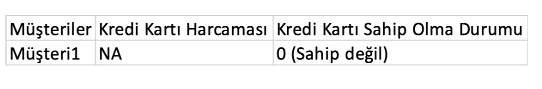

2. NA her zaman eksiklik anlamına gelmeyebilir. Aşağıdaki örnek için, müsteri o ay kredi kartı harcaması yapmamış olabilir yani değeri "0" olabilir

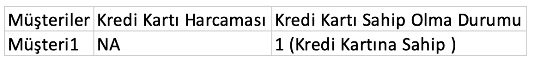

3. Bilgi kaybı olabilir. Aşağıdaki örnekte değişken100 yüzünden diğer bütün bilgileri silebiliriz. 

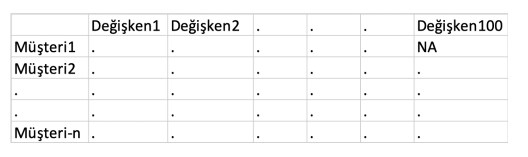

**Kayıp Türleri**

Tümüyle rastlantısal kayıp: diğer değişkenlerden ya da yapısal problemlerden kaynaklanmayan tamamen rastgele oluşan gözlemler

Rastlantısal kayıp: Diğer değişkenlere bağlı olarak oluşabilen eksiklik.

Rastlantısal olmayan Kayıp (En sorunlu tür): Gözardı edilemeyecek olan ve yapısal problemler ile ortaya çıkan eksiklik türü

**Veri kaybının rastantısal olup olmadığını anlamak için:**

    Görsel Teknikler
    Bağımsız iki örneklem T testi
    Korelasyon Testi
    Little'in MCAR Testi

**Eksik veriler için uygulanabilecek yöntemler**

    Silme Yöntemleri
        Gözlem ya da değişken silme yöntemi
        Liste bazında silme yöntemi (Listwise Method)
        Çiftler bazında silme yöntemi (Pairwise Method)
    Değer Atama Yöntemleri
        Ortanca, ortalama, medyan ataması
        En benzer birime atama (hot deck)
        Dış kaynaklı atama
    Tahmine Dayalı Atama Yöntemleri
        Makine öğrenmesi
        EM algoritması
        Çoklu atama yöntemi
        
        

### 2.1. Hızlı Çözüm

**Eksik Değerlerin Tespit edilmesi**

In [87]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [88]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [89]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [90]:
df.isnull().sum().sum()

7

In [91]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [95]:
#en az bir eksik değer varsa seç
df[df.isnull().any(axis = 1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [96]:
#hepsi dolu olanlar
df[df.notnull().all(axis = 1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [99]:
df[df["V1"].notnull() & df["V2"].notnull()]

,V1,V2,V3
0,1.0,7.0,NaN
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


**Eksik değerlerin doğrudan silinmesi**

In [102]:
df.dropna()
#df.dropna(inplace=True) # çalıştırılırsa üzerine yazılacaktır.

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [103]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


**Basit deger atama**

In [104]:
df["V1"]

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: V1, dtype: float64

In [105]:
df["V1"].mean()

6.0

In [106]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [107]:
df["V2"].fillna(0)

0     7.0
1     0.0
2     5.0
3     8.0
4    12.0
5     0.0
6     0.0
7     2.0
8     3.0
Name: V2, dtype: float64

In [109]:
#her değişkene aytı ayrı atama yapmak yerine tamamına ortalama atayabiliriz
df.apply(lambda x: x.fillna(x.mean()), axis = 0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


### 2.2.  Eksik Veri Yapısının Görselleştirilmesi

In [110]:
!pip install missingno

In [114]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


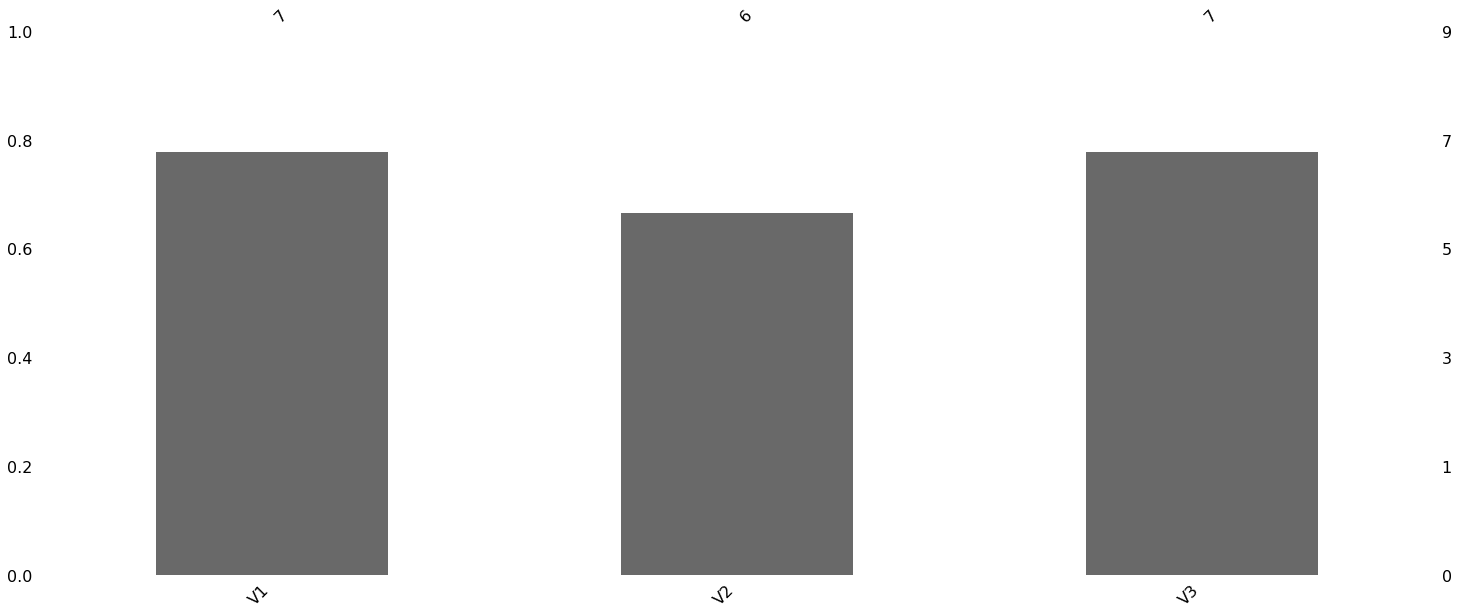

In [112]:
import missingno as msno
msno.bar(df);

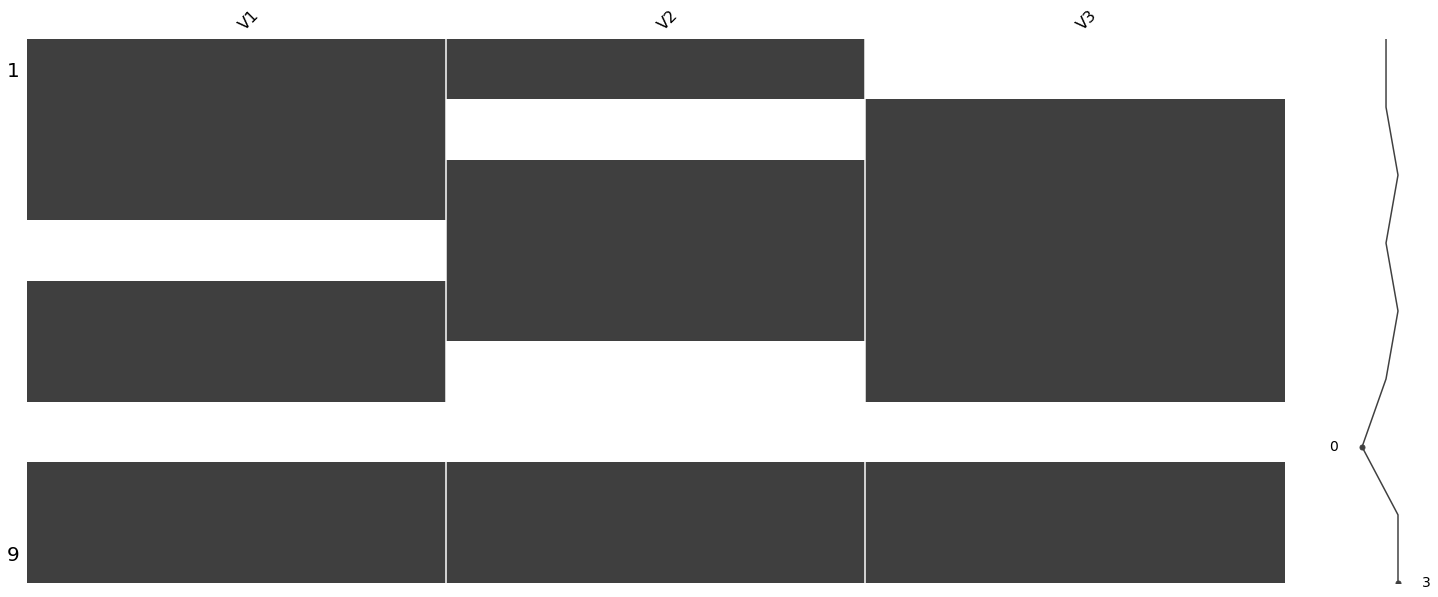

In [113]:
msno.matrix(df);

In [115]:
import seaborn as sns
df = sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [116]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

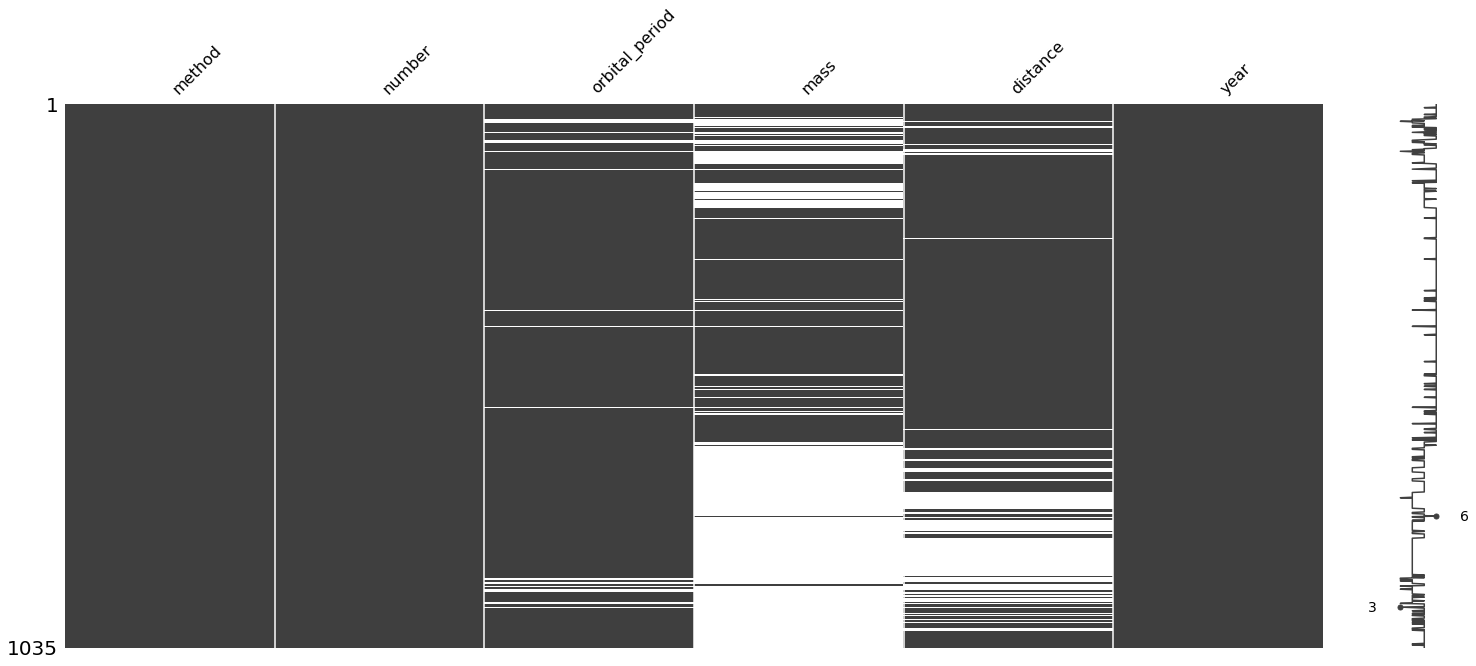

In [121]:
msno.matrix(df);

üstteki grafikte sağdaki; 
    
    3: aynı anda 3veri dolu, 
    6: aynı anda 6veri dolu 
    
Matris ayrıntılı incelendiğinde özellikle orbital_period bilgisi boş olanlarda mass bilgisinin de boş olduğunu görüyoruz. Bu da bize orbital_period ve mass değişkenleri arasında bir ilişki olduğunu gösteriyor. Benzer şekilde mass ve distance değişkenleri incelendiğinde benzer bir durum görülmüyor. Bu da iki değişken arasında bir ilişki olmayabileceğini ifade ediyor.



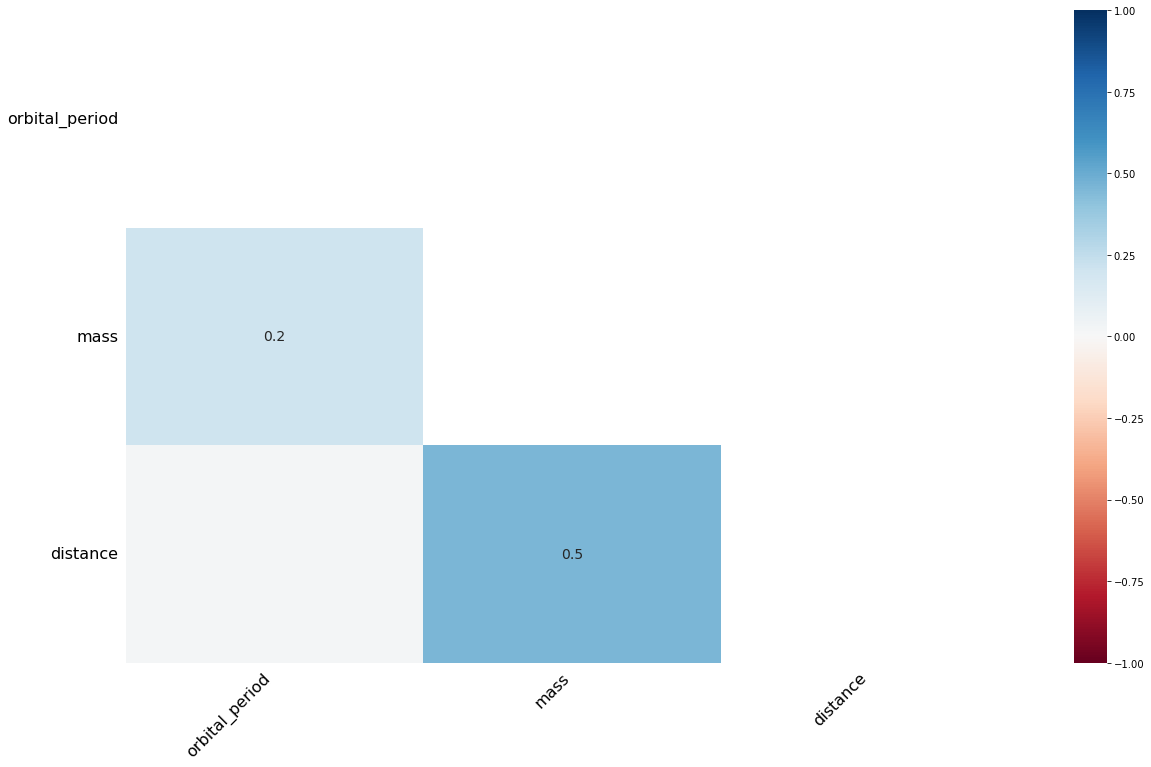

In [122]:
msno.heatmap(df);

üstteki grafik:

heatmap ile nullity correlation bilgisini bize sunar. bu değerler [-1,+1] aralığındadır. 
nullity correaltion -1 ise: ters yönde bir ilişki var
nullity correaltion 0 ise: herhangi bir ilişki yok
nullity correaltion 1 ise: değerlerin eksiklikleri birbirleriyle alakalı

yukarıda mass ve distance arasında bir fark olmadığını düşünmüştük ancak nullity correlation bize 0.5 oranında bir korelasyon olduğunu söylemiş oluyor.

Bu veriseti için:
    rassal bir eksikliğe sahip değildir. doğrudan doldurma ya da silme gibi işlemler verinin yapısını bozacaktır.
    
### 2.3. Silme Yöntemleri

In [123]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [136]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [137]:
#tüm değişkenlerin aynı anda eksik olduğu verileri sil
df.dropna(how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [138]:
#boş olan sütunları sil
df.dropna(axis = 1)

""
0
1
2
3
4
5
6
7
8


In [139]:
df["bos"]=np.nan
df

,V1,V2,V3,bos
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,NaN,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
6,NaN,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


In [140]:
#tüm değerleri boş olan değişkeni sil
df.dropna(axis = 1, how = "all", inplace = True)
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### 2.4. Değer Atama Yöntemleri

#### 2.4.1.Sayısal değişkenlerde değer atama

In [141]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [142]:
df["V1"].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [143]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [144]:
#tüm değişkenler için ortalama atama
df.apply(lambda x: x.fillna(x.mean()), axis = 0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [145]:
#aynı işlemin farklı yöntemi
df.fillna(df.mean()[:])

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [146]:
df.fillna(df.mean()["V1":"V2"])

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [147]:
df["V3"].fillna(df["V3"].median())

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

**Kategorik değişken kırılımına göre değer atama**

In [169]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,np.NaN,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,NaN,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [170]:
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    6.333333
Name: maas, dtype: float64

In [171]:
df2=df.copy()
df2["maas"].fillna(df.groupby("departman")["maas"].transform("mean"),inplace=True)

In [172]:
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,NaN,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [173]:
df2

,maas,V2,V3,departman
0,1.000000,7.0,NaN,IT
1,3.000000,NaN,12.0,IT
2,6.000000,5.0,5.0,IK
3,4.666667,8.0,6.0,IK
4,7.000000,12.0,14.0,IK
5,1.000000,NaN,7.0,IK
6,4.666667,NaN,NaN,IK
7,6.333333,2.0,2.0,IT
8,15.000000,3.0,31.0,IT


#### 2.4.2.Kategorik  değişkenlerde değer atama

In [174]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
        "departman" : V4}        
)

df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [176]:
#departmanda en sık gözlenen değer nedir
df["departman"].mode()[0]

'IK'

In [177]:
df["departman"].fillna(df["departman"].mode()[0])

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [179]:
#inplace kullanılmadığı için eski halinde
df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [181]:
#oncesi veya sonrasindaki değerle doldurulabilir.
#bfill sonraki ile doldurur
df["departman"].fillna(method = "bfill")

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [182]:
#oncesi veya sonrasindaki değerle doldurulabilir.
#ffill önceki ile doldurur
df["departman"].fillna(method = "ffill")

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

#### 2.4.3. Tahmine Dayalı Değer Atama Yöntemleri

In [183]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

**KNN (K-Nearest Neighbors) En yakın komşu**

In [187]:
!pip install ycimpute

In [189]:
#KNN (K-Nearest Neighbors) En yakın komşu 
from ycimpute.imputer import knnimput

In [191]:
var_names = list(df)
var_names

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [193]:
import numpy as np
n_df = np.array(df)
n_df

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  3.    ,     nan,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 0.    ,  3.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [194]:
n_df.shape

(891, 6)

In [195]:
#k değeri komşuluk sayısını ifade eder.
dff = knnimput.KNN(k = 4).complete(n_df)

Imputing row 1/891 with 0 missing, elapsed time: 0.103
Imputing row 101/891 with 0 missing, elapsed time: 0.104
Imputing row 201/891 with 0 missing, elapsed time: 0.105
Imputing row 301/891 with 1 missing, elapsed time: 0.106
Imputing row 401/891 with 0 missing, elapsed time: 0.107
Imputing row 501/891 with 0 missing, elapsed time: 0.108
Imputing row 601/891 with 0 missing, elapsed time: 0.109
Imputing row 701/891 with 0 missing, elapsed time: 0.110
Imputing row 801/891 with 0 missing, elapsed time: 0.111


In [196]:
type(dff)

numpy.ndarray

In [197]:
import pandas as pd
dff = pd.DataFrame(dff, columns = var_names)

In [198]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [200]:
df

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [199]:
dff

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.000000,1.0,0.0,7.2500
1,1.0,1.0,38.000000,1.0,0.0,71.2833
2,1.0,3.0,26.000000,0.0,0.0,7.9250
3,1.0,1.0,35.000000,1.0,0.0,53.1000
4,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,0.0,2.0,27.000000,0.0,0.0,13.0000
887,1.0,1.0,19.000000,0.0,0.0,30.0000
888,0.0,3.0,26.026414,1.0,2.0,23.4500
889,1.0,1.0,26.000000,0.0,0.0,30.0000


**Random Forests**

In [1]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])

In [2]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [3]:
var_names = list(df)
import numpy as np
n_df = np.array(df)

In [29]:
!pip install missingpy


In [33]:
from ycimpute.imputer import iterforest
#IterImput kaldırılmış onun yerine missForest var ama o da hata veriyor
#dff = iterforest.IterImput().complete(n_df)
dff = iterforest.MissForest().complete(n_df)
import pandas as pd
dff = pd.DataFrame(dff, columns = var_names)




IndexError: index 180 is out of bounds for axis 0 with size 177

In [34]:
#********************************************************

from missingpy import MissForest
#IterImput kaldırılmış onun yerine missForest var ama o da hata veriyor
#dff = iterforest.IterImput().complete(n_df)
#dff = iterforest.MissForest().complete(n_df)
imputer = MissForest()

dff_imputed = imputer.fit_transform(dff)
import pandas as pd
dff_imputed = pd.DataFrame(dff_imputed, columns = var_names)

ModuleNotFoundError: No module named 'sklearn.neighbors.base'

**EM algoritması**

In [280]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])

from ycimpute.imputer import EM
var_names = list(df)
import numpy as np
n_df = np.array(df)

In [281]:
dff = EM().complete(n_df)
dff = pd.DataFrame(dff, columns = var_names)
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [282]:
dff

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,0.0,2.0,27.0,0.0,0.0,13.0000
887,1.0,1.0,19.0,0.0,0.0,30.0000
888,0.0,3.0,0.0,1.0,2.0,23.4500
889,1.0,1.0,26.0,0.0,0.0,30.0000


## 3. Değişken Standardizasyonu

In [297]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
var_names = list(df)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


**Standardizasyon**

Değişkenin kendi içindeki bilgi ve varyans yapısını bozmadan, değerleri değiştirip belli bir formata sokup bu formatta işlenmesine olanak sağlamak için veriyi standart hale getirme işlemine standardizasyon adını veriyoruz. Değişken (veri) standardizasyonunda taşınan bilginin dağılımı yayılımı değişmez. Bu kısmı biraz daha açmak gerekirse istatiksel değerler korunur, mesela 10. Sırada olan bir veri yeni formatta tekrar 10. Sırada yer alır.


Verisetinin taşıdığı bilginin özütünü bozmadan (varyansı değişmez), belirli bir standarta getirir (bilgiyi değiştirir).

Dönüştürme ise bilgiyi bazen bozar bazen de temsil şeklini değiştirir.

In [298]:
from sklearn import preprocessing 
df2=preprocessing.scale(df)

In [299]:
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [301]:
df2 = pd.DataFrame(df2, columns = var_names)
df2

,V1,V2,V3
0,-1.578410,-0.345547,-0.709208
1,-0.649934,-0.345547,0.927426
2,0.742781,-1.209416,-0.981981
3,0.278543,0.086387,-0.709208
4,1.207020,1.814124,1.472971


**Normalizasyon**

Değerleri [0,1] aralığına dönüştürür.

In [302]:
df3=preprocessing.normalize(df)
df3 = pd.DataFrame(df3, columns = var_names)
df3

,V1,V2,V3
0,0.107833,0.754829,0.646997
1,0.211079,0.492518,0.844317
2,0.646997,0.539164,0.539164
3,0.447214,0.715542,0.536656
4,0.354914,0.608424,0.709828


**Min-Max Dönüşümü**

Değerleri belirlediğimiz bir aralıkta olacak şekilde dönüştürür.


In [306]:
scaler=preprocessing.MinMaxScaler(feature_range = (100,200))
df4=scaler.fit_transform(df)
df4 = pd.DataFrame(df4, columns = var_names)
df4

,V1,V2,V3
0,100.000000,128.571429,111.111111
1,133.333333,128.571429,177.777778
2,183.333333,100.000000,100.000000
3,166.666667,142.857143,111.111111
4,200.000000,200.000000,200.000000


In [307]:
print(df.mean())
print(df2.mean())
print(df3.mean())
print(df4.mean())

V1    4.4
V2    7.8
V3    8.6
dtype: float64
V1   -1.332268e-16
V2    4.440892e-17
V3    8.881784e-17
dtype: float64
V1    0.353607
V2    0.622095
V3    0.655392
dtype: float64
V1    156.666667
V2    140.000000
V3    140.000000
dtype: float64


## 4. Değişken Dönüşümleri
Standardizasyon işlemleri de değikken dönüşümü işlemlerindendir.

### 4.1. Binarize Dönüşümü

Belirli bir eşik değerinin altında kalan verileri 0 üstünde kalanları 1 yapar

In [325]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df1 = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df1 = df1.astype(float)
var_names = list(df1)
df1

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [328]:
binarizer=preprocessing.Binarizer(threshold=5).fit(df1)
df1_1=binarizer.transform(df1)
df1_1 = pd.DataFrame(df1_1, columns = var_names)
df1_1

,V1,V2,V3
0,0.0,1.0,1.0
1,0.0,1.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,1.0
4,1.0,1.0,1.0


### 4.1. (0-1) Dönüşümü

In [3]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
lbe.fit_transform(df["sex"])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [5]:
df["sex"] = lbe.fit_transform(df["sex"])
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,Sun,Dinner,2
1,10.34,1.66,1,No,Sun,Dinner,3
2,21.01,3.50,1,No,Sun,Dinner,3
3,23.68,3.31,1,No,Sun,Dinner,2
4,24.59,3.61,0,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,No,Sat,Dinner,3
240,27.18,2.00,0,Yes,Sat,Dinner,2
241,22.67,2.00,1,Yes,Sat,Dinner,2
242,17.82,1.75,1,No,Sat,Dinner,2


### 4.2. "1 ve Diğerleri (0) " Dönüşümü
3 sınıflı bir kategorik değişkende, sadece bir sınıfa odaklanmak istedişimizde belirlenen sınıfı 1 geri kalan hepsini de 0 yapar

In [315]:
df["day"].str.contains("Sun")

0       True
1       True
2       True
3       True
4       True
       ...  
239    False
240    False
241    False
242    False
243    False
Name: day, Length: 244, dtype: bool

In [316]:
import numpy as np 
df["yeni_day"] = np.where(df["day"].str.contains("Sun"), 1, 0)
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0


### 4.3. Çok Sınıflı Dönüşüm

In [318]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
lbe.fit_transform(df["day"])
df["enyeni_day"] = lbe.fit_transform(df["day"])
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_day,enyeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1,2
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0,1


**Not:** Kategorik değişkenleri dönüştürme yaparken dikkat edilmelidir. Sayısal verilere dönüştüğünde makine öğrenmesi algoritmaları bu değerlerin arasında bir ilişki olduğunu varsayabilmektedir. Yukarıdaki örnek için enyeni_day değişkeninde 3>2>1 şeklinde düşünebilir. bunun önüne geçmek için One-Hot Dönüşümü uygulanabilir.

### 4.4. One-Hot Dönüşümü ve Dummy Değişken Tuzağı

In [319]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_day,enyeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1,2


In [321]:
df_one_hot = pd.get_dummies(df, columns = ["sex"], prefix = ["sex"])
df_one_hot

,total_bill,tip,smoker,day,time,size,yeni_sex,yeni_day,enyeni_day,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,2,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,2,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,1,0,1,1,0
240,27.18,2.00,Yes,Sat,Dinner,2,0,0,1,0,1
241,22.67,2.00,Yes,Sat,Dinner,2,1,0,1,1,0
242,17.82,1.75,No,Sat,Dinner,2,1,0,1,1,0


**Not:** Üstteki görünümde öncelikle cinsiyet değişkeni silindi ve onun yerine iki değişken daha geldi "sex_Male" ve "sex_Female"

**Not2:** **Dummy değişken tuzağı** bir veriseti içindeki değişkenlere bir dönüşüm uygulandığında, dönüşüm sonrasında oluşan yeni değişkenler birbirleri üzerinden oluşturulabiliyorsa bu duruma dummy değişken tuzağı denilmektedir.

In [329]:
df_one_hot2=pd.get_dummies(df, columns = ["day"], prefix = ["day"]).head()
df_one_hot2

,total_bill,tip,sex,smoker,time,size,yeni_sex,yeni_day,enyeni_day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,1,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,2,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,2,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,1,2,0,0,0,1


### 4.5. Sürekli Değikenin Kategorik değişkene dönüştürülmesi

In [342]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [343]:
dff=df.select_dtypes(include=["float64","int64"])
var_names = list(dff)
dff

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [354]:
#n_bins=[total_bill 3 kategori,tip 4 kategori, size 2 kategori] 
est=preprocessing.KBinsDiscretizer(n_bins=[3,4,2],encode="ordinal",strategy="quantile").fit(dff)
dff_kat=est.transform(dff)

In [355]:
dff_kat = pd.DataFrame(dff_kat, columns = var_names)
dff_kat.head()

,total_bill,tip,size
0,1.0,0.0,1.0
1,0.0,0.0,1.0
2,2.0,2.0,1.0
3,2.0,2.0,1.0
4,2.0,3.0,1.0


In [356]:
dff_kat.tail()

,total_bill,tip,size
239,2.0,3.0,1.0
240,2.0,1.0,1.0
241,2.0,1.0,1.0
242,1.0,0.0,1.0
243,1.0,2.0,1.0


In [357]:
print(pd.unique(dff_kat["total_bill"]))

[1. 0. 2.]


In [358]:
print(pd.unique(dff_kat["tip"]))

[0. 2. 3. 1.]


In [359]:
print(pd.unique(dff_kat["size"]))

[1. 0.]


### 4.6. Değişken - Index, Index - Değişken Dönüşümleri

In [360]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [363]:
df["yeniDegisken"]=df.index+1

In [364]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeniDegisken
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,2
2,21.01,3.50,Male,No,Sun,Dinner,3,3
3,23.68,3.31,Male,No,Sun,Dinner,2,4
4,24.59,3.61,Female,No,Sun,Dinner,4,5


In [365]:
df.index=df["yeniDegisken"]
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeniDegisken
yeniDegisken,,,,,,,,
1,16.99,1.01,Female,No,Sun,Dinner,2,1
2,10.34,1.66,Male,No,Sun,Dinner,3,2
3,21.01,3.50,Male,No,Sun,Dinner,3,3
4,23.68,3.31,Male,No,Sun,Dinner,2,4
5,24.59,3.61,Female,No,Sun,Dinner,4,5
